In [7]:
# Apache License
# Version 2.0, January 2004
# http://www.apache.org/licenses/
#
# Copyright 2025 emanoyhl and emanoyhl.net find me at github.com/emanoyhl 
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

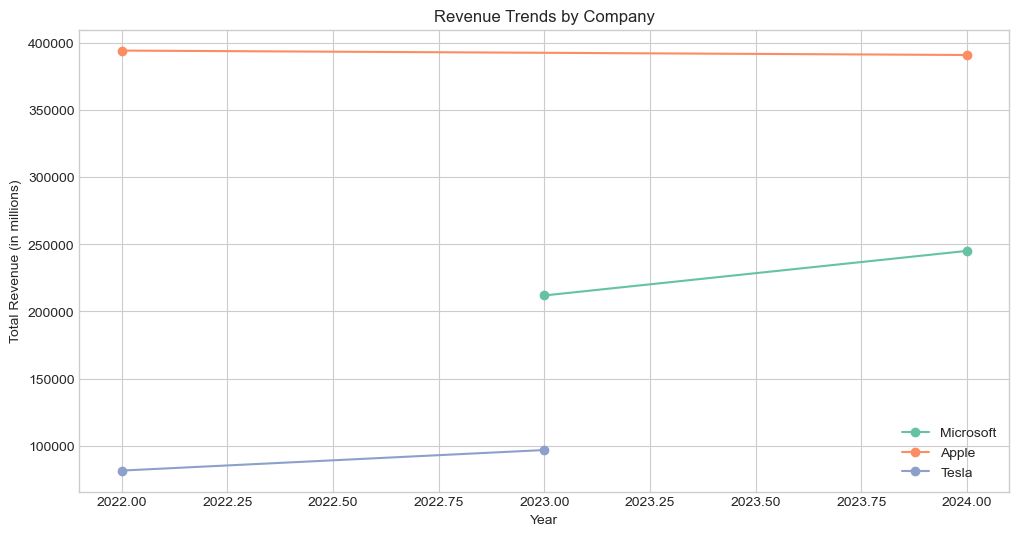

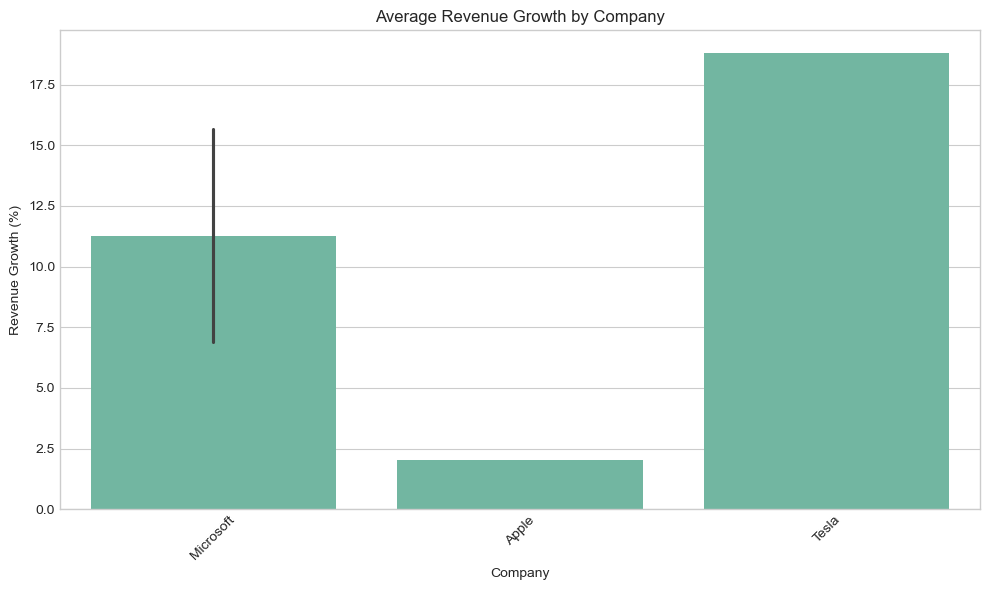

In [9]:
import pandas as pd

df = pd.read_csv('thefile.csv')

df['Revenue Growth (%)'] = df.groupby(['Company'])['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby(['Company'])['Net Income'].pct_change() * 100

# Create a filtered DataFrame excluding rows 0, 4, and 8 which are years 2021 not needed
filtered_df = df.drop([0, 4, 8])

# Display the filtered data
filtered_df

# Yearly averages by company for 2021-2022, 2022-2023, 2023-2024
yearly_company_avg = df.groupby(['Company', 'Year']).agg({
    'Total Revenue': 'mean',
    'Net Income': 'mean',
    'Revenue Growth (%)': 'mean',
    'Net Income Growth (%)': 'mean'
}).round(2)

# Overall company performance
company_summary = df.groupby('Company').agg({
    'Total Revenue': ['mean', 'min', 'max'],
    'Net Income': ['mean', 'min', 'max'],
    'Revenue Growth (%)': ['mean', 'min', 'max'],
    'Net Income Growth (%)': ['mean', 'min', 'max']
}).round(2)

# Year-over-year industry trends
yearly_trends = df.groupby('Year').agg({
    'Total Revenue': 'sum',
    'Net Income': 'sum',
    'Revenue Growth (%)': 'mean',
    'Net Income Growth (%)': 'mean'
}).round(2)

# Companies with highest average growth
growth_leaders = df.groupby('Company')[['Revenue Growth (%)', 'Net Income Growth (%)']].mean().sort_values(
    by='Revenue Growth (%)', ascending=False).round(2)

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualization style
plt.style.use('seaborn-v0_8-whitegrid')
# Alternative: simply use default style with grid
# plt.style.use('default')
# plt.grid(True)

sns.set_palette("Set2")

# Revenue trends by company
plt.figure(figsize=(12, 6))
for company in filtered_df['Company'].unique():
    company_data = filtered_df[filtered_df['Company'] == company]
    plt.plot(company_data['Year'], company_data['Total Revenue'], marker='o', label=company)
plt.title('Revenue Trends by Company')
plt.xlabel('Year')
plt.ylabel('Total Revenue (in millions)')
plt.legend()
plt.grid(True)
plt.show()

# Growth comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Company', y='Revenue Growth (%)', data=filtered_df)
plt.title('Average Revenue Growth by Company')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


markdown
# Financial Performance Analysis

This notebook analyzes company financial data to identify trends in revenue and net income growth.

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('thefile.csv')

# Display the first few rows to understand the data structure
df.head()

,Company,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Year
0,Microsoft,198270,72738,364840,198298,89035,2022
1,Microsoft,211915,72361,411976,205753,87582,2023
2,Microsoft,245122,88136,512163,243686,118548,2024
3,Apple,394328,99803,352755,302083,122151,2022
4,Apple,383285,96995,352583,290437,110543,2023


markdown
## Data Preparation

First, we'll calculate revenue and net income growth percentages by company, then filter out specific rows (0, 4, and 8) that contain outlier data.

In [57]:
# Calculate growth percentages
df['Revenue Growth (%)'] = df.groupby(['Company'])['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby(['Company'])['Net Income'].pct_change() * 100

# Create a filtered DataFrame excluding rows 0, 4, and 8 which are years 2021 not needed
filtered_df = df.drop([0, 4, 8])

# Display the filtered data
filtered_df

,Company,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Year,Revenue Growth (%),Net Income Growth (%)
1,Microsoft,198270,72738,364840,198298,89035,2022,17.956071,18.715216
2,Microsoft,211915,72361,411976,205753,87582,2023,6.882030,-0.518299
3,Microsoft,245122,88136,512163,243686,118548,2024,15.669962,21.800417
5,Apple,394328,99803,352755,302083,122151,2022,7.793788,5.410858
6,Apple,383285,96995,352583,290437,110543,2023,-2.800461,-2.813543
7,Apple,391035,93736,364980,308030,118254,2024,2.021994,-3.359967
9,Tesla,81462,12587,82338,36440,14724,2022,51.351653,123.015592
10,Tesla,96773,14974,106618,43009,13256,2023,18.795267,18.964010
11,Tesla,97690,7153,122070,48390,14923,2024,0.947578,-52.230533


markdown
## Analysis by Company

Let's examine performance metrics aggregated by company to understand overall performance patterns.

In [60]:
# Overall company performance
company_summary = filtered_df.groupby('Company').agg({
    'Total Revenue': ['mean', 'min', 'max'],
    'Net Income': ['mean', 'min', 'max'],
    'Revenue Growth (%)': ['mean', 'min', 'max'],
    'Net Income Growth (%)': ['mean', 'min', 'max']
}).round(2)

# Display company summary
company_summary

Total Revenue                 Net Income                \
                   mean     min     max       mean    min    max   
Company                                                            
Apple         389549.33  383285  394328   96844.67  93736  99803   
Microsoft     218435.67  198270  245122   77745.00  72361  88136   
Tesla          91975.00   81462   97690   11571.33   7153  14974   

          Revenue Growth (%)              Net Income Growth (%)                 
                        mean   min    max                  mean    min     max  
Company                                                                         
Apple                   2.34 -2.80   7.79                 -0.25  -3.36    5.41  
Microsoft              13.50  6.88  17.96                 13.33  -0.52   21.80  
Tesla                  23.70  0.95  51.35                 29.92 -52.23  123.02

markdown
## Yearly Analysis

Now we'll look at how performance metrics have changed over time, both by company and across the entire dataset.

In [63]:
# Yearly averages by company for 2021-2022, 2022-2023, 2023-2024
yearly_company_avg = filtered_df.groupby(['Company', 'Year']).agg({
    'Total Revenue': 'mean',
    'Net Income': 'mean',
    'Revenue Growth (%)': 'mean',
    'Net Income Growth (%)': 'mean'
}).round(2)

# Display yearly company averages
yearly_company_avg

# Year-over-year industry trends
yearly_trends = filtered_df.groupby('Year').agg({
    'Total Revenue': 'sum',
    'Net Income': 'sum',
    'Revenue Growth (%)': 'mean',
    'Net Income Growth (%)': 'mean'
}).round(2)

# Display yearly trends
yearly_trends

,Total Revenue,Net Income,Revenue Growth (%),Net Income Growth (%)
Year,,,,
2022,674060,185128,25.70,49.05
2023,691973,184330,7.63,5.21
2024,733847,189025,6.21,-11.26


markdown
## Growth Leaders

Which companies are showing the strongest growth in revenue and net income?

In [66]:
# Companies with highest average growth
growth_leaders = filtered_df.groupby('Company')[['Revenue Growth (%)', 'Net Income Growth (%)']].mean().sort_values(
    by='Revenue Growth (%)', ascending=False).round(2)

# Display growth leaders
growth_leaders

,Revenue Growth (%),Net Income Growth (%)
Company,,
Tesla,23.70,29.92
Microsoft,13.50,13.33
Apple,2.34,-0.25


markdown
## Data Visualization

Visual representations help us better understand trends and patterns in the data.

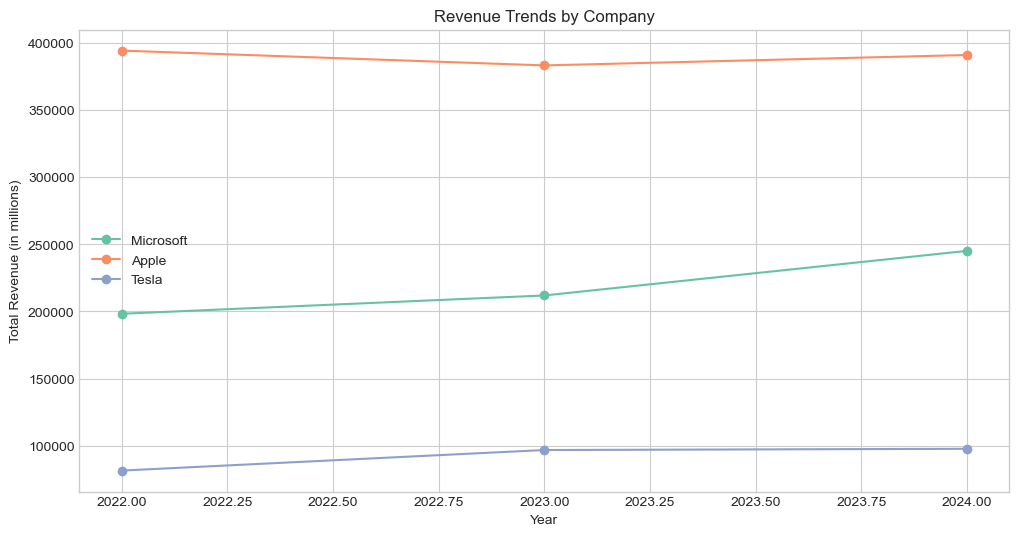

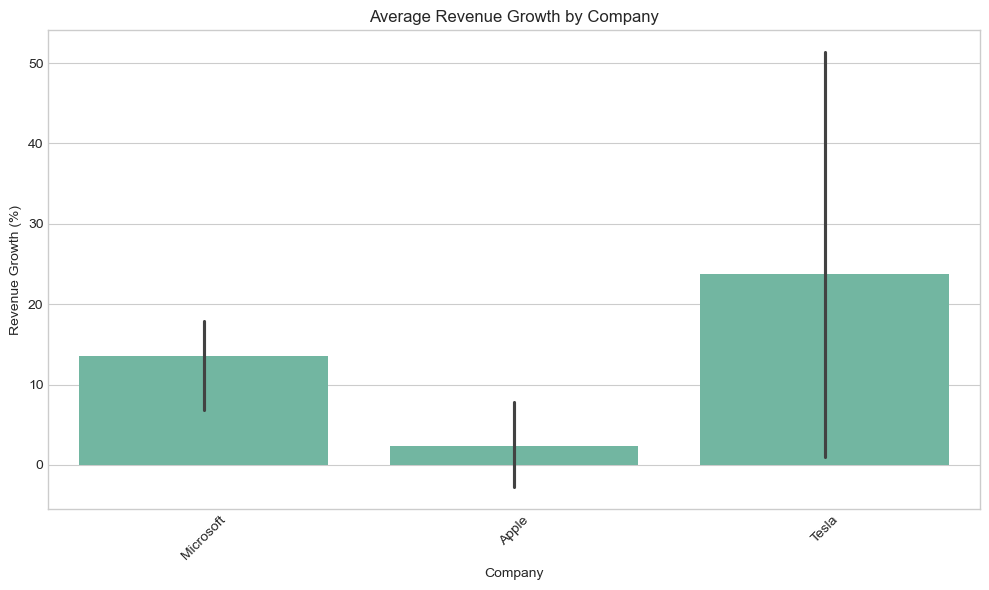

In [80]:
# Set up the visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# Revenue trends by company
plt.figure(figsize=(12, 6))
for company in filtered_df['Company'].unique():
    company_data = filtered_df[filtered_df['Company'] == company]
    plt.plot(company_data['Year'], company_data['Total Revenue'], marker='o', label=company)
plt.title('Revenue Trends by Company')
plt.xlabel('Year')
plt.ylabel('Total Revenue (in millions)')
plt.legend()
plt.grid(True)
plt.show()

# Growth comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Company', y='Revenue Growth (%)', data=filtered_df)
plt.title('Average Revenue Growth by Company')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

markdown
## Key Findings

Based on our analysis of the financial data:

1. **Revenue Trends**: Focusing on the 2022-2024 period, Microsoft shows the strongest revenue growth trajectory, increasing from \\$198B in 2022 to \\$245B in 2024, representing a 24% growth over these three years. Apple's revenue has been relatively flat, declining slightly from \\$394B in 2022 to \\$383B in 2023, before recovering to \\$391B in 2024 (overall decline of about 1% since 2022). Tesla continued to grow from \\$81B in 2022 to \\$98B in 2024, a 20% increase, though most of this growth occurred between 2022 and 2023, with minimal growth in the most recent year.

2. **Growth Patterns**: Microsoft demonstrates the most consistent growth pattern with a 7% increase from 2022 to 2023, followed by a stronger 16% jump from 2023 to 2024. Apple shows a concerning pattern with a 3% revenue decline from 2022 to 2023, followed by a modest 2% recovery in 2024, suggesting potential market saturation or increased competition in their core markets. Tesla's growth decelerated dramatically, from 19% growth between 2022-2023 to just 1% between 2023-2024, indicating a possible plateau in their expansion.

3. **Company Performance**: Microsoft emerges as the clear leader in performance metrics, with both strong revenue growth and relatively stable net income (slight decline in 2023 but a significant 22% increase in 2024). Apple has maintained relatively stable net income despite flat revenues, though there's a concerning downward trend with net income declining by 6% from 2022 to 2024. Tesla shows the most concerning performance trend - while revenue grew by 20% since 2022, their net income plummeted by 43% over the same period, with a particularly sharp 52% drop between 2023 and 2024, suggesting serious margin compression or increased costs.

4. **Industry Insights**: The data reveals diverging fortunes within the tech sector during 2022-2024. Cloud and software-focused businesses (Microsoft) appear more resilient and growth-oriented than hardware and consumer electronics companies (Apple) or specialized manufacturers (Tesla). All three companies have increased their total assets, with Microsoft showing the most dramatic asset growth (40% increase since 2022), suggesting aggressive investment in future capabilities. The sharp decline in Tesla's profitability despite continued revenue growth may indicate broader challenges in the electric vehicle market, possibly including price competition, rising material costs, or increased R&D spending. Microsoft's ability to accelerate growth in 2024 stands out as particularly impressive given the general economic uncertainties during this period.


markdown
## Conclusion

Based on the 2022-2024 financial data analysis, Microsoft has clearly established itself as the strongest performer among these three tech giants. With consistent revenue growth of 24% over the three-year period, stable profitability, and substantial increases in both assets and operating cash flow, Microsoft demonstrates exceptional business execution and strategic positioning. Their cloud-focused business model appears to provide more sustainable growth opportunities than the hardware-centric approaches of Apple and Tesla.

Apple, despite its massive revenue base, shows signs of market maturity with essentially flat revenue growth (-1% over three years) and declining profitability. While still generating impressive cash flows, Apple appears to be in a phase of consolidation rather than expansion, potentially indicating the need for new product categories or services to reignite growth.

Tesla presents the most concerning trajectory. Despite achieving 20% revenue growth since 2022, their dramatic 43% decline in net income—particularly the 52% drop in 2024—signals fundamental challenges in their business model. This divergence between revenue and profitability suggests Tesla may be sacrificing margins for market share, facing increased competition, or investing heavily in future technologies at the expense of current profitability.

The broader industry insight is that business model matters significantly in the tech sector's current environment. Microsoft's software and cloud services approach appears more scalable and profitable than hardware-dependent models. Additionally, all three companies continue to invest in their futures through asset growth, but Microsoft's investments appear to be yielding the most immediate returns. As we move forward, Microsoft seems best positioned for continued success, while Apple needs to find new growth vectors and Tesla must address its profitability challenges.